## Communicate Data Findings (Ford GoBike System Data)



## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city.

In this project, I will work on the 2017 dataset and I will study what are the factors effect trip duration and how? is there any relationship between two or more columns? therefore, I will go thro three steps univariate exploration, bivariate exploration, and multivariate exploration

In [227]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [228]:
#Read the datasets which is about 2017.
df= pd.read_csv('2017-fordgobike-tripdata.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [229]:
df.shape

(519700, 15)

# Univariate Exploration



**In this section, individuals variables will be explored.**

### Duration:

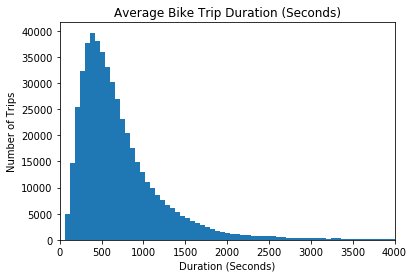

In [230]:
#Plotting the duration column to study the average trip duration. 
bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 60)
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges)
#zoom in
plt.xlim(0,4000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Number of Trips');

Since the plot is skewed to the right and there is a long tail in the distribution. I will use the log transformation trying to make it normal distribution.

In [231]:
#To simplify the plot, I will convert the seconds to minutes by divide the duration by 60.
df['duration_min'] = df['duration_sec'] / 60

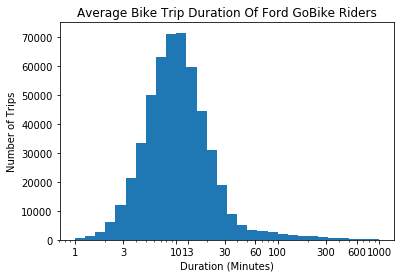

In [232]:
#Using the log transform.
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1,3, 10,13,30,60,  100, 300,600, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('The Average Bike Trip Duration Of Ford GoBike Riders');
plt.ylabel('Number of Trips');

**The average bike duration is between 1 and 200 minutes. Most of bike trips duration around 13 minutes.**

### Start Station Name:

In [233]:
get_order= df['start_station_name'].value_counts().index[0:10]

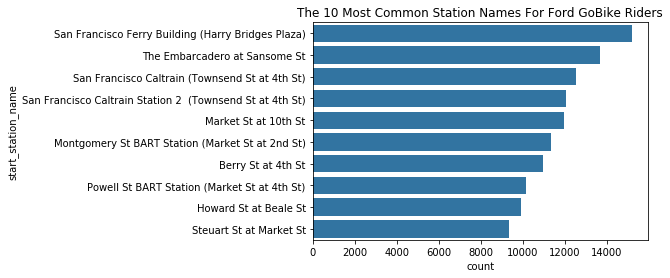

In [234]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'start_station_name', color = base_color, order= get_order)
plt.title("The 10 Most Common Station Names For Ford GoBike Riders");

**The above plot shows the 10 most common station names for Ford GoBike riders. This will help Ford GoBike system owner to know what is the most frequent station used to add more bikes there, which will increase the income of the goBike.**

### User Type:

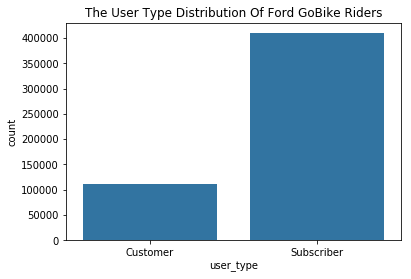

In [235]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.title("The User Type Distribution Of Ford GoBike Riders");

**It's clear that most users belong to Subscriber type.**

### Member Birth Year:

In [236]:
#To count age from the year of birth
df['member_age'] = 2019-df['member_birth_year']

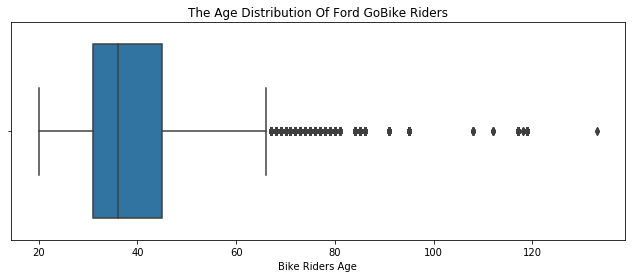

In [237]:
plt.figure(figsize=(11,4))
sb.boxplot(x='member_age', data=df)
plt.title("The Age Distribution Of Ford GoBike Riders")
plt.xlabel("Bike Riders Age");

As you can see there are outliers and it's clear there are some member ages more than 100! So, I'll remove the user whose age more than 63.

In [238]:
#To remove the outliers 
df = df[df['member_age']<=63]

In [239]:
df['member_age'].mean()

37.92452494396197

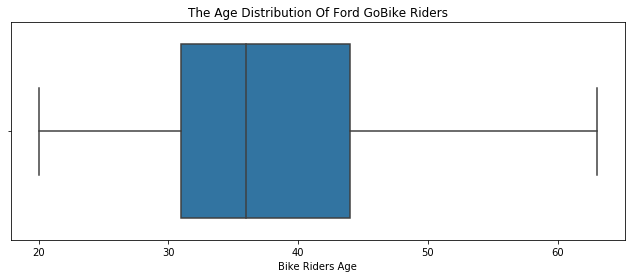

In [240]:
plt.figure(figsize=(11,4))
sb.boxplot(x='member_age', data=df)
plt.title("The Age Distribution Of Ford GoBike Riders")
plt.xlabel("Bike Riders Age");

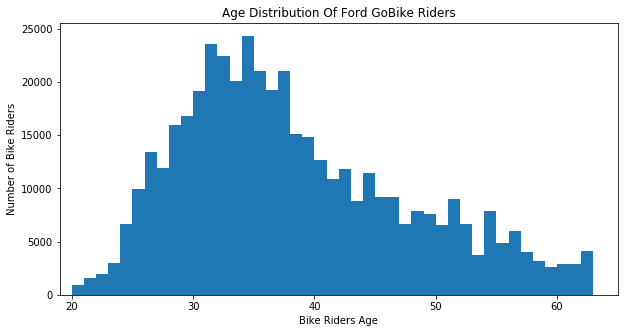

In [241]:
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, df['member_age'].max()+1, 1)
plt.hist(data = df, x = 'member_age', bins = bin_edges)
#zoom in
plt.xlim(19,65)
plt.title('Age Distribution Of Ford GoBike Riders')
plt.xlabel('Bike Riders Age')
plt.ylabel('Number of Bike Riders');

**The user age start from 20 to 63 years old and the mean is around 38. So, as you can see the majority age distribution of Ford GoBike riders between 30 to 40. Therefore, the most number of riders have 35 years old.**

### Member Gender:

In [242]:
#Divide trip by gender and count bike id for each of them
gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [243]:
# add proportion column which contains the percentage of bike per gender
gender_df['proportion'] = (gender_df['bike_id']/gender_df['bike_id'].sum())*100
gender_df

,bike_id,proportion
member_gender,,
Female,97322,21.924554
Male,340397,76.684126
Other,6176,1.391320


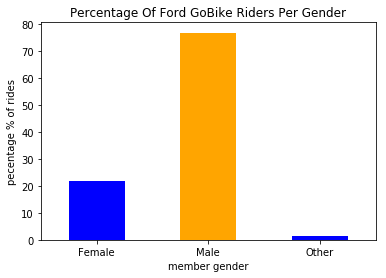

In [244]:
#plot gender type desterpution 
gender_df['proportion'].plot(kind='bar', color= ['blue','orange','blue'])
plt.title('Percentage Of Ford GoBike Riders Per Gender')
plt.ylabel('pecentage % of rides')
plt.xlabel('member gender')
plt.xticks(rotation=360);

**The most gender type of Ford goBike riders are males by more than 75% of bike riders**

# Bivariate Exploration
**In this section, the relationship between binary variables will be explored.**

### Duration & Months

Here I'll try to study the relationship between the trip duration and the months to see if there is a specific month that has a long trip duration and is the month affect the trip duration and why?

In [245]:
# I'll create a column month by extracting the months from start_time column (it's contain 6 months only)
df['month'] = pd.DatetimeIndex(df['start_time']).month

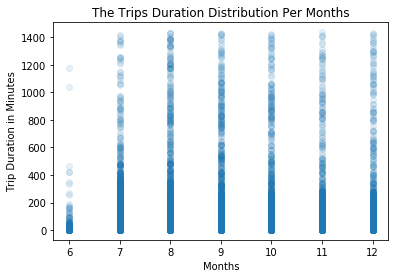

In [246]:
#plot duration & months.
plt.scatter(data = df , x = 'month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trips Duration Distribution Per Months')
plt.xlabel('Months')
plt.ylabel('Trip Duration in Minutes');

**The plot shows the period from August to October in 2017 has the most trip duration. However, June has the lowest trip duration**

In [247]:
#I'll divide the 6 months into 3 seasons Summer, Fall And Winter and get avrege duration for each season.
summer = df.query('month in ["6" , "7" , "8"] ').duration_min.mean()
fall = df.query('month in ["9" , "10" , "11"] ').duration_min.mean()
winter = df.query('month == "12"' ).duration_min.mean()

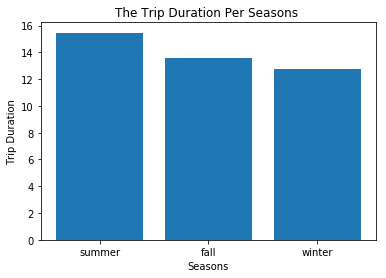

In [248]:
#plot duration per season.
plt.bar(['summer','fall','winter'],[summer , fall , winter] )
plt.title('The Trip Duration Per Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

**you can see that the Summer has the longest trip duration with an average around 23 minutes. Also, Winter has the lowest trip duration with an average around 15 minutes. Thus, we may conclude that the weather impacts the trip duration.**

### Age & Months

I'll try to study the relationship between the rider's ages and the months to see if there is a specific month that has the highest age group and is the age affect the monthly trips?


In [258]:
# divide age into 4 groups 
df['member_generation'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20 else '20 - 30' if 20<x<=30 else '30 - 40' if 30<x<=40 else '40 - 50' if 40<x<=50 else '50 - 60' if 50<x<=60 else x)

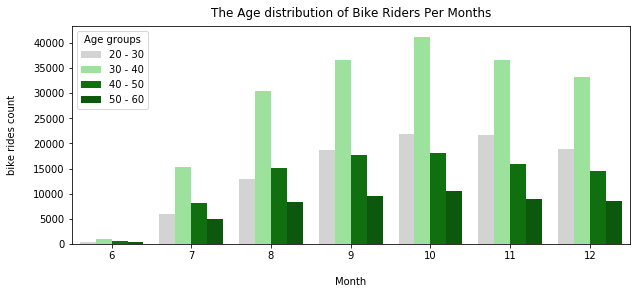

In [259]:
#plot The Age distribution of Bike Riders Per Months
plt.figure(figsize=(10,4))
my_palette = {'20 - 30': 'lightgrey', '30 - 40': 'lightgreen', '40 - 50': 'green','50 - 60': 'darkgreen' }
ax = sb.countplot(x='month', hue='member_generation', palette=my_palette, data=df[df['member_generation'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60'])].sort_values(by=['month', 'member_generation']))
plt.title('The Age distribution of Bike Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel('bike rides count', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':10})

**As we know the age distribution of Ford GoBike riders between 30 to 40 is the highest. However, now we can see that October has the highest bike rides.**

### User Type & Months

I'll try to study the relationship between the user types and the months to see if the user type affect the monthly trips?

In [251]:
type_per_month = df.groupby(["month", "user_type"]).size().reset_index()

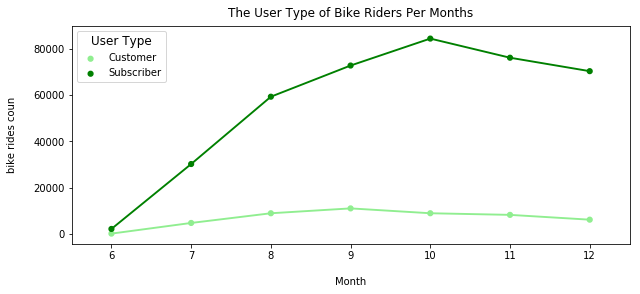

In [252]:
plt.figure(figsize=(10,4))
my_palette = {'Subscriber':'green', 'Customer':'lightgreen'}
ax = sb.pointplot(x='month', y=0, hue='user_type', palette=my_palette, scale=.7, data=type_per_month)
plt.title('The User Type of Bike Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel('bike rides coun', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':12})

**The plot shows that the customer looks increasing however the subscriber clearly increasing and get highest in October.**

### Gender & Months 
I'll try to study the relationship between the user's gender and the months to see if the user's gender affect the monthly trips?

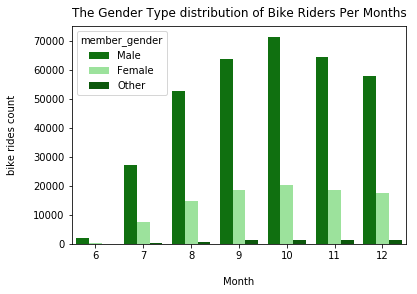

In [253]:
my_palette = {'Female':'lightgreen', 'Male': 'green','Other': 'darkgreen' }
sb.countplot(data = df, x = 'month', hue = 'member_gender',palette=my_palette)
plt.title('The Gender Type distribution of Bike Riders Per Months', y=1.015)
leg.set_title('The Gender Type')
plt.xlabel('Month', labelpad=16)
plt.ylabel('bike rides count', labelpad=16);

**As we know the member gender distribution of Ford GoBike riders for Males is the highest. However, now we can see that from June to October has the highest bike rides.**

# Multivariate Exploration
**In this section, the relationship between multiple variables will be explored.**

### Duration & Months & User Type

I'll try to study the relationship between the trip duration,  user type and the months. What I will focus on to see each user type leads to the low or long trip duration and in which month.

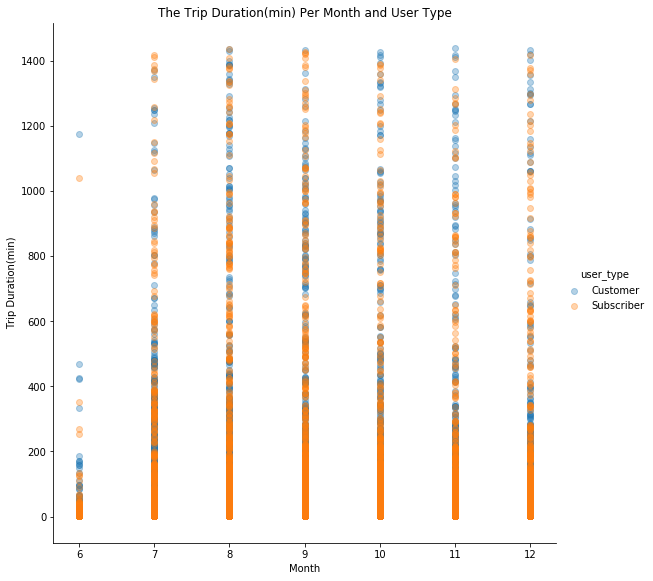

In [254]:
# plot duration per user type and months
g = sb.FacetGrid(data =  df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

**The plot shows that the customers tend to rent the bikes for longer trips than the Subscribers, it's mostly spanning over 500 minutes.**

### Duration & Months & User gender

I'll try to study the relationship between the trip duration,  user gender and the months. What I will focus on to see each user gender leads to the low or long trip duration and in which month.

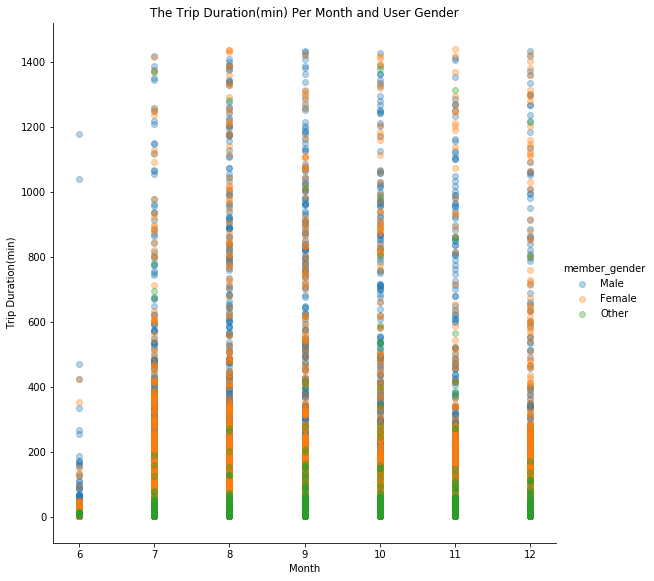

In [255]:
# plot duration per user gender and months
g = sb.FacetGrid(data =  df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per Month and User Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

**The plot shows that the Males tend to rent the bikes for longer trips than the Females, it's mostly spanning over 700 minutes.**

### Duration& User Ages  & User Type 

In [256]:
# to get data with age grouped
group_df =df[df['member_generation'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60'])].sort_values(by=['month', 'member_generation'])

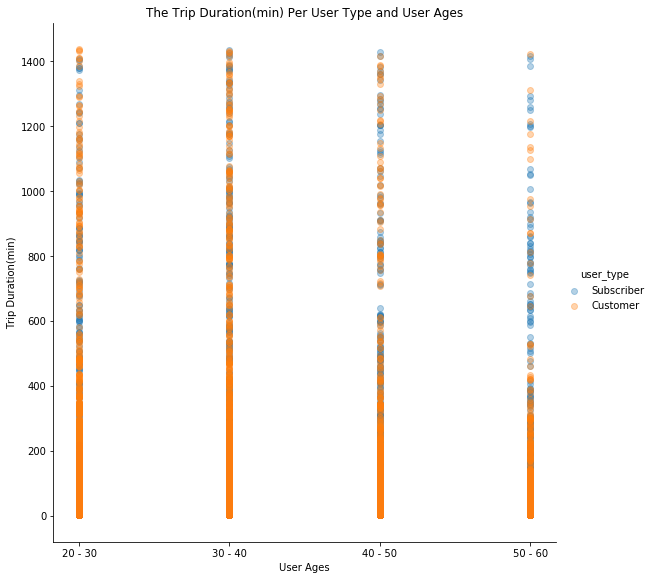

In [257]:
# plot duration per user ages and type
g = sb.FacetGrid(data =  group_df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'member_generation','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per User Type and User Ages')
plt.xlabel('User Ages')
plt.ylabel('Trip Duration(min)');

**The plot shows that the customer from 20-40 tends to take long trip duration and from 40-60 tends to rent a bike for short trip duration where subscriber from 40-60 mostly spanning over 400 minutes.**

# Conclusion 


**In conclusion, I observed many things affect the tripe duration in 2017,  such as months ( especially on summer season), user ages, user type, and user genders.**

**In univariate exploration section, I find out the most of bike trips duration around 12 minutes. Also, most of the users are in 30 to 40 years old age(when the mean age is 38). Plus, more than 70% of bike riders are subscribers and more than 75% of bike riders are male. Moreover, I showed the 10 most common station names for Ford GoBike riders. This will help Ford GoBike system owner to know what is the most frequent station used to add more bikes there, which will increase the income of the goBike.**

**In bivariate and multivariate exploration section, the period from August to October in 2017 has the most trip duration. However, June has the lowest trip duration. Plus, the Summer has the longest trip duration with an average around 23 minutes. Thus, we may conclude that the weather impacts the trip duration. Therefore users from 30 to 40 years old are more likely to rides bike for long durations. Also, males are the highest bike riders than females. Moreover, the trip duration impacted by the seasons because of the weather so most of the people ride bikes cause of the nice weather in San Francisco. In addition, an interesting fact about user type is the customers tend to rent the bikes for longer trips, mostly spanning over 500 minutes. So, the customer from 20-40 tends to take long trip duration and from 40-60 tends to rent a bike for short trip duration where subscriber from 40-60 mostly spanning over 400 minutes.**